In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925}
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:,.4f}'.format

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
early_stopping_exps = {'6': exp_filepaths.TRAIN_BATCH_SIZE_6,
                       '12': exp_filepaths.TRAIN_BATCH_SIZE_12,
                       '24': exp_filepaths.TRAIN_BATCH_SIZE_24,
                       '35': exp_filepaths.ARCH_UNET_RAW}
ordered_keys = ['6', '12', '24', '35']
cpal = sns.color_palette("muted", 8)

In [3]:
def linear_smoothing(vals, weight=0.6):
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [np.nan]
    a.extend(info)
    return a

Text(0,0.5,'Validation Loss')

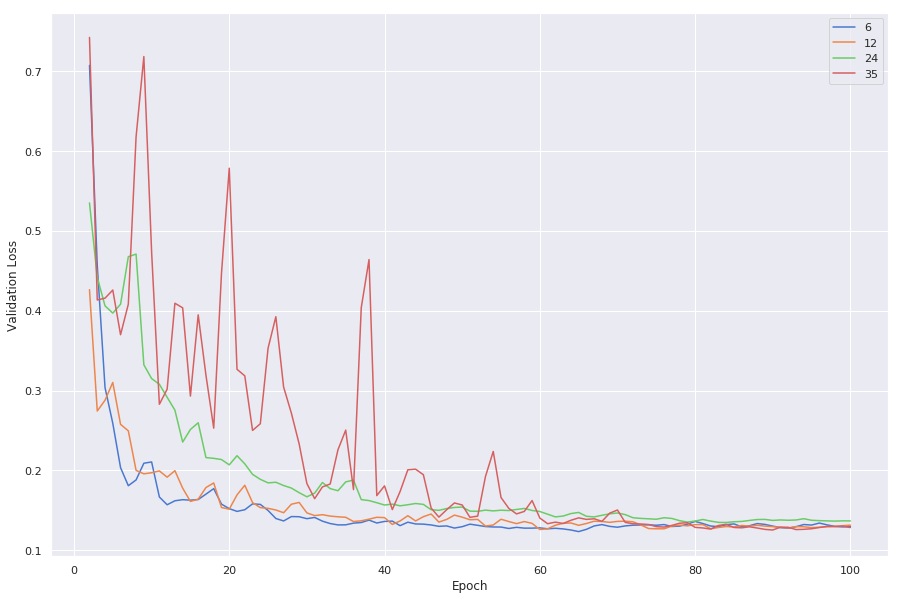

In [4]:
# plot validation losses
fig, ax = plt.subplots(1,1, figsize=(15, 10))

count = 0
for k in ordered_keys:
    exp_filepath = early_stopping_exps[k]
    # load pik file
    ind = exp_filepath.find('test_results')
    base_folder = exp_filepath[:ind]
    pik_path = os.path.join(base_folder, 'pik_data.dat')
    data = io_utils.load_pik(pik_path)
    epochs = data[0]
    val_loss = data[2]
    y = linear_smoothing(val_loss)
    ax.plot(epochs, y, color=cpal[count], linestyle='-')
    
    count += 1

ax.legend(ordered_keys)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')

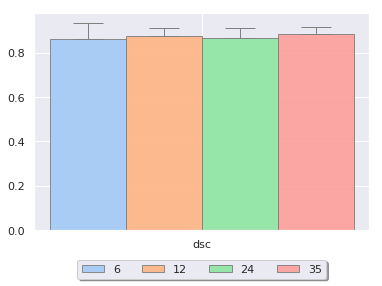

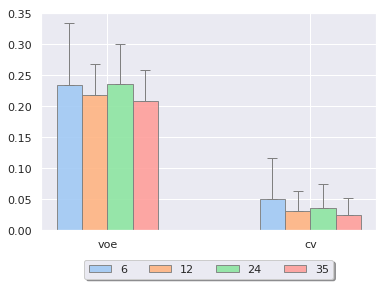

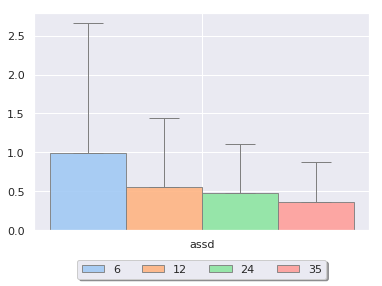

,6,12,24,35
dsc,$0.8631\pm0.071$,$0.8765\pm0.033$,$0.8648\pm0.045$,$0.883\pm0.033$
voe,$0.2345\pm0.1$,$0.2183\pm0.05$,$0.2357\pm0.065$,$0.208\pm0.05$
cv,$0.0504\pm0.065$,$0.0313\pm0.032$,$0.0357\pm0.039$,$0.0244\pm0.027$
assd,$0.9963\pm1.669$,$0.5502\pm0.894$,$0.4734\pm0.638$,$0.3544\pm0.518$


In [5]:
# plot validation losses
def plot_metrics(metrics):
    count = 0
    t_mean = []
    t_error = []

    for m in metrics:
        m_mean = []
        m_error = []
        for k in ordered_keys:
            exp_filepath = early_stopping_exps[k]
            metrics_path = os.path.join(exp_filepath, 'metrics.dat')
            data = io_utils.load_pik(metrics_path)[m]

            m_mean.append(np.mean(data))
            m_error.append(np.std(data))

        t_mean.append(m_mean)
        t_error.append(m_error)

    exp_means = pd.DataFrame(t_mean, index=metrics, columns=ordered_keys)
    exp_stds = pd.DataFrame(t_error, index=metrics, columns=ordered_keys)
    
    af.display_bar_graph(exp_means, exp_stds)
    
    df1 = exp_means.round(4).astype(str)
    df2 = exp_stds.round(3).astype(str)
    
    return '$'+df1 + '\pm' + df2 +'$'

dfs = []
dfs.append(plot_metrics(['dsc']))
dfs.append(plot_metrics(['voe', 'cv']))
dfs.append(plot_metrics(['assd']))

df = pd.concat(dfs, axis=0)
df.style.set_properties(**{'width': '300px'})
display(df)

dsc
F-value: 4.9712
p-value: 0.1739

voe
F-value: 4.9712
p-value: 0.1739

cv
F-value: 4.2870
p-value: 0.2321

assd
F-value: 7.1471
p-value: 0.0674

precision
F-value: 3.0552
p-value: 0.3832

recall
F-value: 2.5509
p-value: 0.4662



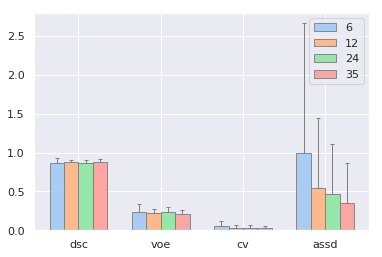

In [6]:
BS = {'filename': 'batch_size',
        'keys': ordered_keys}
BS.update(early_stopping_exps)

stats.kruskal_dunn_analysis([BS[k] for k in BS['keys']], BS['keys'], 'stats-batch_size')
stats.compare_metrics_v2([BS[k] for k in BS['keys']], BS['keys'], 'stats-batch_size')